# **Predictive Analysis**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/file/d/1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG/view?usp=sharing
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG")
df

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
0,Q386391,1990,1,1979.2,VESTIBULAR,4,CANCELAMENTO POR ABANDONO,1989.1,20.0,Evadido,...,4.0,Dispensa,3.0,Aprovado,NaN,ORGANIZACAO INDUSTRIAL,4.0,60.0,UNID. ACAD. DE ADMINISTRAÇÃO E CONTABILIDADE,5.0
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
2,K266013,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,6.1,LINGUA PORTUGUESA,4.0,60.0,UNID. ACAD. DE LETRAS,2.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
4,T079917,1990,1,1996.1,VESTIBULAR,1,GRADUADO,1999.2,8.0,Graduado,...,1.0,Normal,3.0,Aprovado,5.6,FÍSICA GERAL III,6.0,90.0,UNID. ACAD. DE FÍSICA,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30125,E191041,1999,16,2013.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,7.0,Graduado,...,1.0,Normal,4.0,Reprovado,2.4,METODOS ESTATISTICOS,4.0,60.0,UNID. ACAD. DE ESTATÍSTICA,3.0
30126,F026548,1999,18,2014.2,SISU,22,CANCELADO 3 REPROV MESMA DISCIPLINA,2016.1,4.0,Evadido,...,1.0,Normal,4.0,Reprovado,3.8,LABORATÓRIO DE PROGRAMAÇÃO I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,1.0
30127,P065307,1999,1,2008.2,VESTIBULAR,1,GRADUADO,2014.1,12.0,Graduado,...,1.0,Normal,3.0,Aprovado,9.8,DIREITO E CIDADANIA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,6.0
30128,R083868,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,NaN,METODOLOGIA CIENTÍFICA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,1.0


## Preprocessing

In [ ]:
# Filtrar o período de ingresso
df_filtrado = df[(df['periodo_ingresso'] >= 2006.1) & (df['periodo_ingresso'] <= 2019.2)]

# Remover as linhas onde tipo_matricula é "Dispensa"
df_filtrado = df_filtrado[df_filtrado['tipo_matricula'] != 'Dispensa']

# Remover as linhas onde situacao é "Em Curso"
df_filtrado = df_filtrado[df_filtrado['situacao'] != 'Em Curso']

# Verificar as primeiras linhas e informações gerais do dataframe resultante para confirmar as operações
df_filtrado.head(), df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13831 entries, 1 to 30127
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     13831 non-null  object 
 1   codigo_curriculo       13831 non-null  int64  
 2   codigo_ingresso        13831 non-null  int64  
 3   periodo_ingresso       13831 non-null  float64
 4   forma_ingresso         13831 non-null  object 
 5   codigo_evasao          13831 non-null  int64  
 6   forma_evasao           13831 non-null  object 
 7   periodo_evasao         13831 non-null  float64
 8   evadiu_periodo         10602 non-null  float64
 9   forma_saida            13831 non-null  object 
 10  acao_afirmativa        13831 non-null  object 
 11  tipo_reserva_vagas     13831 non-null  int64  
 12  forma_reserva_vagas    13831 non-null  object 
 13  sexo                   13831 non-null  object 
 14  codigo_cor             13831 non-null  int64  
 15  nome_co

(         id  codigo_curriculo  codigo_ingresso  periodo_ingresso  \
 1   A261799              1999               16            2011.1   
 3   H046905              1999               16            2014.1   
 9   X175376              1999               16            2011.2   
 12  C332956              1999                1            2009.2   
 18  Q283427              1999                1            2010.2   
 
        forma_ingresso  codigo_evasao                         forma_evasao  \
 1   VESTIBULAR / ENEM              1                             GRADUADO   
 3   VESTIBULAR / ENEM             21  CANCELADO REPROVOU TODAS POR FALTAS   
 9   VESTIBULAR / ENEM              8    CANCELAMENTO P/ SOLICITACAO ALUNO   
 12         VESTIBULAR              1                             GRADUADO   
 18         VESTIBULAR             12  CANCELADO NOVO INGRESSO MESMO CURSO   
 
     periodo_evasao  evadiu_periodo forma_saida  ... codigo_tipo_matricula  \
 1           2016.1            11.0 

## Basic

### 1.  Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. Do the age of entry and age of dropout have any significant influence on their overall average? Define 3 options for solving this issue and follow the best one.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preparando os dados
df_analysis = df_filtrado.dropna(subset=['idade_ingresso', 'idade_evasao', 'apv_media_geral'])

# Definindo variáveis independentes (X) e dependente (y)
X = df_analysis[['idade_ingresso', 'idade_evasao']]
y = df_analysis['apv_media_geral']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever valores para o conjunto de teste
y_pred = model.predict(X_test)

# Calcular o coeficiente de determinação R^2 para avaliar o modelo
r2 = r2_score(y_test, y_pred)

# Coeficientes do modelo
coefficients = model.coef_

r2, coefficients

(0.00017920878833066478, array([ 3.13119326, -3.57380077]))

### 2. What is the probability of a student’s exit mode being graduated versus dropped out, based on the mode of admission, period of admission, and academic status? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Primeiro, vamos verificar quais são os valores únicos nas colunas relevantes e preparar os dados para o modelo
unique_forma_ingresso = df_filtrado['forma_ingresso'].unique()
unique_situacao = df_filtrado['situacao'].unique()
unique_forma_saida = df_filtrado['forma_saida'].unique()

# Criar uma variável de saída binária para "Graduado" (1) vs "Evadido" (0)
df_filtrado['saida_binaria'] = df_filtrado['forma_saida'].apply(lambda x: 1 if 'Graduado' in x else 0)

unique_forma_ingresso, unique_situacao, unique_forma_saida, df_filtrado['saida_binaria'].value_counts()

(array(['VESTIBULAR / ENEM', 'VESTIBULAR', 'SISU', 'TRANSFERENCIA',
        'REOPCAO', 'JUDICIAL', 'GRADUADO', 'CONVENIO PEC-G', 'REINGRESSO'],
       dtype=object),
 array(['Aprovado', 'Reprovado por Falta', 'Reprovado', 'Trancado',
        'Cancelado', 'Participante', 'Dispensado'], dtype=object),
 array(['Graduado', 'Evadido', 'Reingresso', 'Regular', 'Outros'],
       dtype=object),
 saida_binaria
 0    8074
 1    5757
 Name: count, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

# Preparar dados para o modelo
features = df_filtrado[['forma_ingresso', 'periodo_ingresso', 'situacao']]
target = df_filtrado['saida_binaria']

# Codificação de variáveis categóricas
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' para evitar multicolinearidade
encoded_features = encoder.fit_transform(features[['forma_ingresso', 'situacao']])
encoded_feature_names = encoder.get_feature_names_out(['forma_ingresso', 'situacao'])

# Criar DataFrame a partir das features codificadas
features_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)
features_encoded['periodo_ingresso'] = features['periodo_ingresso'].values  # adicionar o período de ingresso

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0.7595180722891566,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.75      0.79      2433\n           1       0.69      0.77      0.73      1717\n\n    accuracy                           0.76      4150\n   macro avg       0.75      0.76      0.76      4150\nweighted avg       0.77      0.76      0.76      4150\n')

### 3. Is it possible to classify students into categories of academic performance (e.g., high, medium, low) based on their final averages and course workload? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Primeiro, vamos remover registros onde 'media_final' ou 'carga_horaria' sejam nulos para evitar erros nos cálculos
df_filtrado_clean = df_filtrado.dropna(subset=['media_final', 'carga_horaria'])

# Calculando a pontuação ponderada
df_filtrado_clean['pontuacao_ponderada'] = df_filtrado_clean['media_final'] * df_filtrado_clean['carga_horaria']

# Definindo limites para categorização baseada na distribuição da pontuação ponderada
# Usaremos percentis para definir categorias de alto, médio e baixo desempenho
limites = df_filtrado_clean['pontuacao_ponderada'].quantile([0.33, 0.66]).tolist()

# Categorizando os desempenhos
df_filtrado_clean['categoria_desempenho'] = pd.cut(df_filtrado_clean['pontuacao_ponderada'],
                                                   bins=[-float('inf'), limites[0], limites[1], float('inf')],
                                                   labels=['Baixo', 'Médio', 'Alto'])

# Visualizar os resultados
df_filtrado_clean[['media_final', 'carga_horaria', 'pontuacao_ponderada', 'categoria_desempenho']].head(), limites

<ipython-input-8-cad43e4126fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_clean['pontuacao_ponderada'] = df_filtrado_clean['media_final'] * df_filtrado_clean['carga_horaria']
<ipython-input-8-cad43e4126fb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_clean['categoria_desempenho'] = pd.cut(df_filtrado_clean['pontuacao_ponderada'],


(    media_final  carga_horaria  pontuacao_ponderada categoria_desempenho
 1           7.5          300.0               2250.0                 Alto
 3           5.0           60.0                300.0                Baixo
 12          8.3           60.0                498.0                 Alto
 18          1.7           60.0                102.0                Baixo
 22          7.9           60.0                474.0                 Alto,
 [306.0, 462.0])

## Moderate

### 1. Consider that the overall average of a student is defined as the average of all nonnull grades in the courses the student has taken. What is the probability of a student with an overall average below 7.0 and more than 3 failures being approved in the next course? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Calculando a média de cada aluno, contando reprovações e verificando aprovações seguintes

# Primeiro, vamos adicionar uma coluna com valores numéricos para aprovação (1 se aprovado, 0 caso contrário)
df_filtrado['aprovado'] = (df_filtrado['situacao'] == 'Aprovado').astype(int)

# Calculando a média geral dos alunos (ignorando NaN na média_final)
media_geral_alunos = df_filtrado.groupby('id')['media_final'].mean()

# Contando reprovações por aluno
reprovacoes_alunos = df_filtrado[df_filtrado['situacao'].str.contains("Reprovado")].groupby('id').size()

# Juntando as duas séries em um dataframe
df_analise = pd.DataFrame({'media_geral': media_geral_alunos, 'reprovacoes': reprovacoes_alunos}).fillna(0)

# Filtrando alunos com média < 7.0 e mais de 3 reprovações
alunos_criticos = df_analise[(df_analise['media_geral'] < 7.0) & (df_analise['reprovacoes'] > 3)]

# Agora precisamos analisar a taxa de aprovação destes alunos em suas próximas disciplinas cursadas
# Isso exige identificar a próxima disciplina cursada após o último registro conhecido para cada aluno
# Para isso, precisamos verificar a última situação registrada para cada aluno no df_filtrado e o status da próxima disciplina

# Vamos encontrar o último período matriculado para esses alunos
ultimo_periodo_matriculado = df_filtrado.groupby('id')['periodo_matricula'].max()

# Vamos juntar e filtrar para os alunos críticos
df_proxima_disciplina = df_filtrado.join(ultimo_periodo_matriculado, on='id', rsuffix='_ultimo')
df_proxima_disciplina = df_proxima_disciplina[df_proxima_disciplina['id'].isin(alunos_criticos.index)]

# Filtrando para considerar apenas disciplinas após a última conhecida
df_proxima_disciplina = df_proxima_disciplina[df_proxima_disciplina['periodo_matricula'] > df_proxima_disciplina['periodo_matricula_ultimo']]

# Calculando a probabilidade de aprovação
probabilidade_aprovacao = df_proxima_disciplina['aprovado'].mean()
probabilidade_aprovacao

nan

In [ ]:
# Analisando a situação mais recente para os alunos críticos diretamente nos dados atuais
# Utilizando o último período conhecido, em vez de buscar um registro subsequente

# Filtrando df_filtrado para obter apenas registros dos alunos críticos
df_ultimo_conhecido = df_filtrado[df_filtrado['id'].isin(alunos_criticos.index)]

# Encontrando os registros no último período matriculado para cada aluno crítico
df_ultimo_conhecido = df_ultimo_conhecido.join(ultimo_periodo_matriculado, on='id', rsuffix='_ultimo')
df_ultimo_conhecido = df_ultimo_conhecido[df_ultimo_conhecido['periodo_matricula'] == df_ultimo_conhecido['periodo_matricula_ultimo']]

# Calculando a probabilidade de aprovação com base nos últimos dados conhecidos para esses alunos
probabilidade_aprovacao = df_ultimo_conhecido['aprovado'].mean()
probabilidade_aprovacao

0.23466666666666666

### 2. Is it possible to identify patterns of similarity between students with exit modes of dropped out and graduated, considering the mode of admission and course workload? Define 3 options for solving this issue and follow the best one.

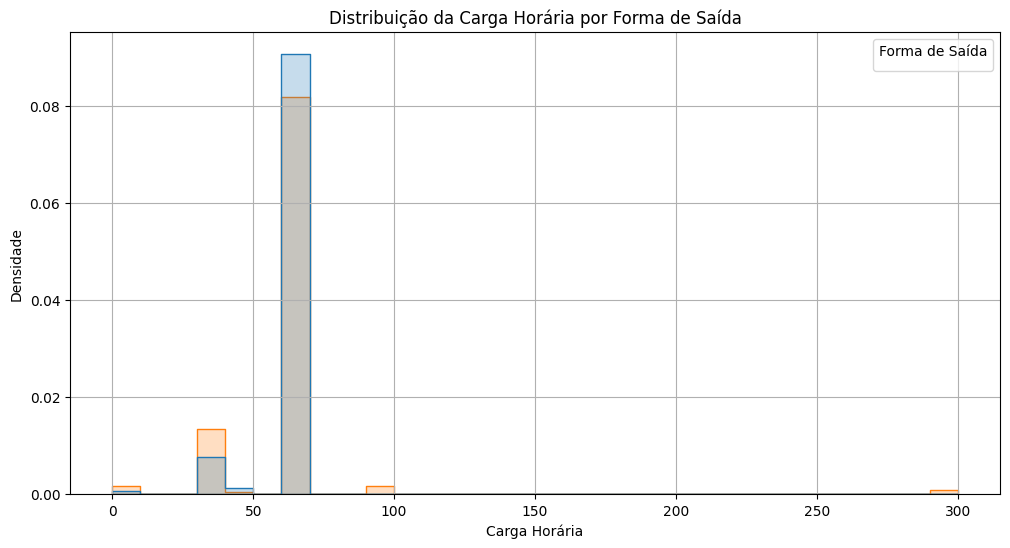

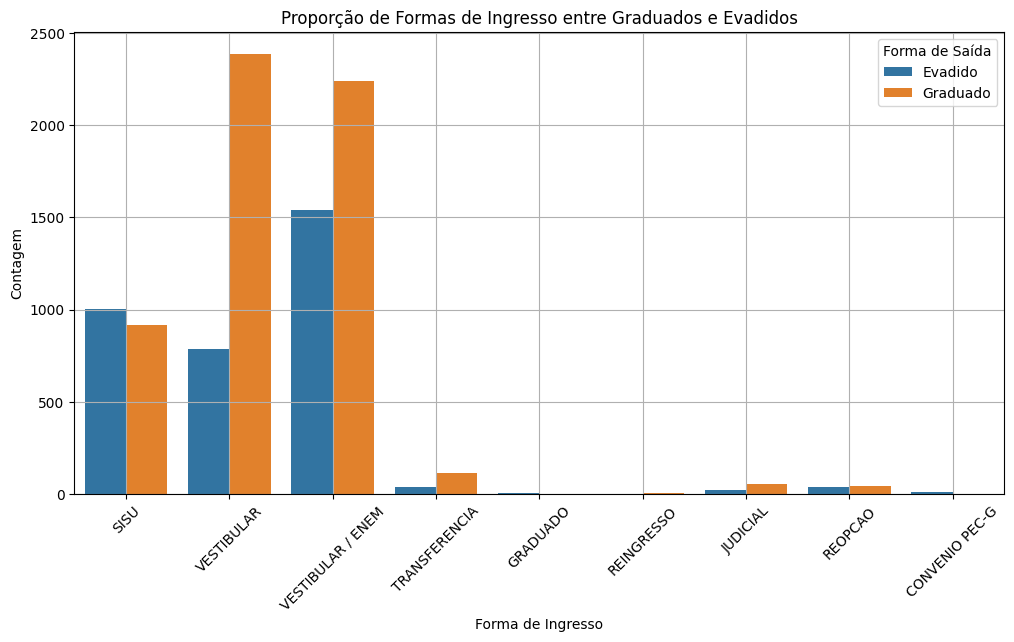

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas as formas de saída 'Graduado' e 'Evadido'
df_interesse = df_filtrado[df_filtrado['forma_saida'].isin(['Graduado', 'Evadido'])]

# Plotar a distribuição da carga horária das disciplinas
plt.figure(figsize=(12, 6))
sns.histplot(data=df_interesse, x='carga_horaria', hue='forma_saida', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribuição da Carga Horária por Forma de Saída')
plt.xlabel('Carga Horária')
plt.ylabel('Densidade')
plt.legend(title='Forma de Saída')
plt.grid(True)
plt.show()

# Plotar a proporção de formas de ingresso
plt.figure(figsize=(12, 6))
sns.countplot(data=df_interesse, x='forma_ingresso', hue='forma_saida')
plt.title('Proporção de Formas de Ingresso entre Graduados e Evadidos')
plt.xlabel('Forma de Ingresso')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Forma de Saída')
plt.grid(True)
plt.show()

### 3. Is it possible to determine a student’s exit mode based on characteristics such as the number of credits taken, type of enrollment, and course status? Define 3 options for solving this issue and follow the best one.


In [ ]:
# Verificando a distribuição da variável 'forma_saida' e a disponibilidade das variáveis relevantes
df_filtrado['forma_saida'].value_counts(), df_filtrado[['numero_creditos', 'tipo_matricula', 'situacao']].describe(include='all')

(forma_saida
 Graduado      5757
 Evadido       3444
 Regular       3229
 Reingresso    1389
 Outros          12
 Name: count, dtype: int64,
         numero_creditos tipo_matricula  situacao
 count      13831.000000          13831     13831
 unique              NaN              4         7
 top                 NaN         Normal  Aprovado
 freq                NaN          12925     10239
 mean           3.787940            NaN       NaN
 std            0.830154            NaN       NaN
 min            0.000000            NaN       NaN
 25%            4.000000            NaN       NaN
 50%            4.000000            NaN       NaN
 75%            4.000000            NaN       NaN
 max           10.000000            NaN       NaN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Codificando as variáveis categóricas
encoder_tipo_matricula = LabelEncoder()
encoder_situacao = LabelEncoder()

df_filtrado['tipo_matricula_encoded'] = encoder_tipo_matricula.fit_transform(df_filtrado['tipo_matricula'])
df_filtrado['situacao_encoded'] = encoder_situacao.fit_transform(df_filtrado['situacao'])

# Preparando os dados para o modelo
X = df_filtrado[['numero_creditos', 'tipo_matricula_encoded', 'situacao_encoded']]
y = df_filtrado['forma_saida']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5446331767256957,
 '              precision    recall  f1-score   support\n\n     Evadido       0.62      0.60      0.61       679\n    Graduado       0.51      0.89      0.65      1106\n      Outros       0.00      0.00      0.00         3\n     Regular       0.63      0.16      0.26       699\n  Reingresso       0.00      0.00      0.00       280\n\n    accuracy                           0.54      2767\n   macro avg       0.35      0.33      0.30      2767\nweighted avg       0.52      0.54      0.47      2767\n')

In [ ]:
# Exibindo as colunas disponíveis para avaliar quais podem ser relevantes
df_filtrado.columns

Index(['id', 'codigo_curriculo', 'codigo_ingresso', 'periodo_ingresso',
       'forma_ingresso', 'codigo_evasao', 'forma_evasao', 'periodo_evasao',
       'evadiu_periodo', 'forma_saida', 'acao_afirmativa',
       'tipo_reserva_vagas', 'forma_reserva_vagas', 'sexo', 'codigo_cor',
       'nome_cor', 'idade_ingresso', 'idade_evasao', 'tipo_ensino_medio',
       'ensino_medio', 'apv_media_geral', 'codigo_disciplina',
       'periodo_matricula', 'turma', 'codigo_tipo_matricula', 'tipo_matricula',
       'codigo_situacao', 'situacao', 'media_final', 'nome_disciplina',
       'numero_creditos', 'carga_horaria', 'nome_setor', 'periodo_relativo',
       'saida_binaria', 'aprovado', 'tipo_matricula_encoded',
       'situacao_encoded', 'sexo_encoded', 'acao_afirmativa_encoded',
       'forma_ingresso_encoded', 'reprovado', 'media_movel_notas',
       'taxa_reprovacao_acumulada'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Codificando a variável 'sexo'
encoder_sexo = LabelEncoder()
df_filtrado['sexo_encoded'] = encoder_sexo.fit_transform(df_filtrado['sexo'])

# Selecionando as novas características
features_to_include = ['idade_ingresso', 'apv_media_geral', 'periodo_relativo', 'sexo_encoded', 'carga_horaria']

# Verificando se há valores faltantes nessas variáveis e preenchendo com a média (para valores contínuos)
for feature in features_to_include:
    if df_filtrado[feature].isnull().any():
        df_filtrado[feature].fillna(df_filtrado[feature].mean(), inplace=True)

# Atualizando o conjunto de características para o modelo
X = df_filtrado[['numero_creditos', 'tipo_matricula_encoded', 'situacao_encoded'] + features_to_include]

# Aplicando a normalização aos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Dividindo os dados em conjuntos de treino e teste novamente
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Treinando o modelo de RandomForest com os novos dados
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões e avaliação do modelo com dados balanceados
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [ ]:
# Preparando os dados sem aplicar SMOTE (apenas com novas características e normalização)
X_scaled = scaler.fit_transform(X)  # Reutilizando o scaler já criado

# Dividindo os dados em conjuntos de treino e teste novamente
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinando o modelo de RandomForest com as novas características
model.fit(X_train, y_train)

# Previsões e avaliação do modelo com as novas características
y_pred = model.predict(X_test)
accuracy_new_features = accuracy_score(y_test, y_pred)
classification_report_new_features = classification_report(y_test, y_pred)

accuracy_new_features, classification_report_new_features

(0.29345861944344054,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00        29\n           4       0.00      0.00      0.00        28\n           5       0.37      0.37      0.37      1061\n           6       0.00      0.00      0.00        48\n           7       0.24      0.24      0.24       768\n           8       0.28      0.29      0.29       830\n\n    accuracy                           0.29      2767\n   macro avg       0.11      0.11      0.11      2767\nweighted avg       0.29      0.29      0.29      2767\n')

In [ ]:
# Criando o scaler novamente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Aplicando a normalização aos dados

# Dividindo os dados em conjuntos de treino e teste novamente
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinando o modelo de RandomForest com as novas características
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões e avaliação do modelo com as novas características
y_pred = model.predict(X_test)
accuracy_new_features = accuracy_score(y_test, y_pred)
classification_report_new_features = classification_report(y_test, y_pred)

accuracy_new_features, classification_report_new_features

(0.29345861944344054,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00        29\n           4       0.00      0.00      0.00        28\n           5       0.37      0.37      0.37      1061\n           6       0.00      0.00      0.00        48\n           7       0.24      0.24      0.24       768\n           8       0.28      0.29      0.29       830\n\n    accuracy                           0.29      2767\n   macro avg       0.11      0.11      0.11      2767\nweighted avg       0.29      0.29      0.29      2767\n')

## Challenging

### 1. Through advanced analysis, can we obtain a student’s performance in PROGRAMMING II, based on their performance in PROGRAMMING I and PROGRAMMING LABORATORY I? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Filtrar dados das disciplinas de interesse
disciplinas_interesse = ['PROGRAMAÇÃO I', 'LABORATÓRIO DE PROGRAMAÇÃO I', 'PROGRAMAÇÃO II']
df_programacao = df_filtrado[df_filtrado['nome_disciplina'].isin(disciplinas_interesse)]

# Reestruturar o DataFrame para ter uma linha por aluno com as notas correspondentes
# Primeiro, vamos criar colunas separadas para cada disciplina com a respectiva média final
df_programacao_pivot = df_programacao.pivot_table(
    index='id',
    columns='nome_disciplina',
    values='media_final',
    aggfunc='max'
)

# Verificar como ficou a estrutura após pivot e a existência de dados faltantes
df_programacao_pivot.info(), df_programacao_pivot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, A026026 to Z391817
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LABORATÓRIO DE PROGRAMAÇÃO I  465 non-null    float64
 1   PROGRAMAÇÃO I                 478 non-null    float64
 2   PROGRAMAÇÃO II                342 non-null    float64
dtypes: float64(3)
memory usage: 32.0+ KB


(None,
 nome_disciplina  LABORATÓRIO DE PROGRAMAÇÃO I  PROGRAMAÇÃO I  PROGRAMAÇÃO II
 id                                                                          
 A026026                                   5.0            NaN             NaN
 A031430                                   NaN            NaN             7.0
 A036974                                   NaN            NaN             8.0
 A062520                                   8.1            NaN             NaN
 A071610                                   NaN            6.3             NaN)

In [ ]:
# Removendo entradas com dados faltantes nas três disciplinas de interesse
df_programacao_complete = df_programacao_pivot.dropna()

# Verificando a quantidade de registros completos e exibindo algumas linhas
df_programacao_complete.info(), df_programacao_complete.head()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, A319340 to Y095408
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LABORATÓRIO DE PROGRAMAÇÃO I  18 non-null     float64
 1   PROGRAMAÇÃO I                 18 non-null     float64
 2   PROGRAMAÇÃO II                18 non-null     float64
dtypes: float64(3)
memory usage: 576.0+ bytes


(None,
 nome_disciplina  LABORATÓRIO DE PROGRAMAÇÃO I  PROGRAMAÇÃO I  PROGRAMAÇÃO II
 id                                                                          
 A319340                                   7.4            7.4             8.0
 D130417                                   7.3            7.3             4.1
 I010676                                   7.0            7.0             8.0
 I111606                                   8.1            8.1             8.8
 J181613                                   7.8            7.8             5.7)

In [ ]:
# Calcular a matriz de correlação para as disciplinas de interesse
correlation_matrix = df_programacao_pivot.corr()

correlation_matrix

nome_disciplina,LABORATÓRIO DE PROGRAMAÇÃO I,PROGRAMAÇÃO I,PROGRAMAÇÃO II
nome_disciplina,,,
LABORATÓRIO DE PROGRAMAÇÃO I,1.000000,0.739216,0.421720
PROGRAMAÇÃO I,0.739216,1.000000,0.343538
PROGRAMAÇÃO II,0.421720,0.343538,1.000000


### 2. Through advanced analysis, is it possible to predict the mode of admission based on the period of admission, gender, affirmative action, and age of entry? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Verificar as colunas disponíveis no dataframe e algumas linhas de exemplo para as colunas de interesse
df_filtrado.columns, df_filtrado[['forma_ingresso', 'periodo_ingresso']].head(), df_filtrado[['sexo', 'acao_afirmativa', 'idade_ingresso']].head() if {'sexo', 'acao_afirmativa', 'idade_ingresso'}.issubset(df_filtrado.columns) else "Missing columns"

(Index(['id', 'codigo_curriculo', 'codigo_ingresso', 'periodo_ingresso',
        'forma_ingresso', 'codigo_evasao', 'forma_evasao', 'periodo_evasao',
        'evadiu_periodo', 'forma_saida', 'acao_afirmativa',
        'tipo_reserva_vagas', 'forma_reserva_vagas', 'sexo', 'codigo_cor',
        'nome_cor', 'idade_ingresso', 'idade_evasao', 'tipo_ensino_medio',
        'ensino_medio', 'apv_media_geral', 'codigo_disciplina',
        'periodo_matricula', 'turma', 'codigo_tipo_matricula', 'tipo_matricula',
        'codigo_situacao', 'situacao', 'media_final', 'nome_disciplina',
        'numero_creditos', 'carga_horaria', 'nome_setor', 'periodo_relativo',
        'saida_binaria', 'aprovado', 'tipo_matricula_encoded',
        'situacao_encoded', 'sexo_encoded', 'acao_afirmativa_encoded',
        'forma_ingresso_encoded', 'reprovado', 'media_movel_notas',
        'taxa_reprovacao_acumulada'],
       dtype='object'),
       forma_ingresso  periodo_ingresso
 19451           SISU            2017.1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Codificador para transformar variáveis categóricas em números
label_encoder = LabelEncoder()

# Preparando as variáveis categóricas
df_filtrado['sexo_encoded'] = label_encoder.fit_transform(df_filtrado['sexo'])
df_filtrado['acao_afirmativa_encoded'] = label_encoder.fit_transform(df_filtrado['acao_afirmativa'])
df_filtrado['forma_ingresso_encoded'] = label_encoder.fit_transform(df_filtrado['forma_ingresso'])

# Definindo features e target
X = df_filtrado[['periodo_ingresso', 'sexo_encoded', 'acao_afirmativa_encoded', 'idade_ingresso']]
y = df_filtrado['forma_ingresso_encoded']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de Floresta Aleatória
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
rf_classifier.fit(X_train, y_train)

# Verificando a acurácia no conjunto de teste
accuracy = rf_classifier.score(X_test, y_test)
accuracy

0.9612048192771084

### 3. Through advanced analysis, can we track a student’s academic trajectory over time, using their sequence of grades and their course status (such as Passed and Failed), to anticipate the possibility of a lockout situation in the future? Define 3 options for solving this issue and follow the best one.

In [ ]:
# Verificando as colunas disponíveis no dataframe para entender quais características podem ser utilizadas
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13831 entries, 19451 to 14401
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13831 non-null  object 
 1   codigo_curriculo           13831 non-null  int64  
 2   codigo_ingresso            13831 non-null  int64  
 3   periodo_ingresso           13831 non-null  float64
 4   forma_ingresso             13831 non-null  object 
 5   codigo_evasao              13831 non-null  int64  
 6   forma_evasao               13831 non-null  object 
 7   periodo_evasao             13831 non-null  float64
 8   evadiu_periodo             10602 non-null  float64
 9   forma_saida                13831 non-null  object 
 10  acao_afirmativa            13831 non-null  object 
 11  tipo_reserva_vagas         13831 non-null  int64  
 12  forma_reserva_vagas        13831 non-null  object 
 13  sexo                       13831 non-null  obje

In [ ]:
# Verificar a quantidade de dados faltantes para as colunas selecionadas
missing_data = df_filtrado[['idade_ingresso', 'idade_evasao', 'apv_media_geral', 'media_final']].isnull().sum()
missing_data

idade_ingresso        0
idade_evasao       3229
apv_media_geral     447
media_final        1373
dtype: int64

In [ ]:
# Cálculo da média móvel das notas e taxa de reprovação acumulada
# Assumindo que "media_final" é a nota da disciplina e que reprovado é qualquer nota < 5

# Criando uma coluna para indicar reprovação
df_filtrado['reprovado'] = df_filtrado['media_final'] < 5

# Ordenando os dados para garantir que a média móvel seja calculada corretamente
df_filtrado.sort_values(by=['id', 'periodo_matricula'], inplace=True)

# Calculando a média móvel das notas usando uma janela de 3 períodos (exemplificando)
df_filtrado['media_movel_notas'] = df_filtrado.groupby('id')['media_final'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculando a taxa de reprovação acumulada
df_filtrado['taxa_reprovacao_acumulada'] = df_filtrado.groupby('id')['reprovado'].cumsum() / df_filtrado.groupby('id').cumcount()

# Mostrar algumas linhas para verificar as novas colunas
df_filtrado[['id', 'periodo_matricula', 'media_final', 'media_movel_notas', 'reprovado', 'taxa_reprovacao_acumulada']].head()

,id,periodo_matricula,media_final,media_movel_notas,reprovado,taxa_reprovacao_acumulada
19451,A009386,2017.1,7.0,7.000000,False,NaN
28775,A009386,2017.2,NaN,7.000000,False,0.0
8318,A010012,2017.1,8.2,8.200000,False,NaN
5437,A010012,2018.1,6.4,7.300000,False,0.0
22646,A010012,2019.1,9.3,7.966667,False,0.0


In [ ]:
# Corrigindo o cálculo da taxa de reprovação acumulada para evitar divisão por zero
df_filtrado['taxa_reprovacao_acumulada'] = df_filtrado.groupby('id')['reprovado'].cumsum() / (df_filtrado.groupby('id').cumcount() + 1)

# Mostrar algumas linhas novamente para verificar as correções
df_filtrado[['id', 'periodo_matricula', 'media_final', 'media_movel_notas', 'reprovado', 'taxa_reprovacao_acumulada']].head()

,id,periodo_matricula,media_final,media_movel_notas,reprovado,taxa_reprovacao_acumulada
19451,A009386,2017.1,7.0,7.000000,False,0.0
28775,A009386,2017.2,NaN,7.000000,False,0.0
8318,A010012,2017.1,8.2,8.200000,False,0.0
5437,A010012,2018.1,6.4,7.300000,False,0.0
22646,A010012,2019.1,9.3,7.966667,False,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Codificação de variáveis categóricas
# Utilizando LabelEncoder para simplificar a demonstração
label_encoder = LabelEncoder()
df_filtrado['forma_ingresso_encoded'] = label_encoder.fit_transform(df_filtrado['forma_ingresso'])
df_filtrado['situacao_encoded'] = label_encoder.fit_transform(df_filtrado['situacao'])

# Features e Target
features = df_filtrado[['idade_ingresso', 'apv_media_geral', 'media_movel_notas', 'taxa_reprovacao_acumulada',
                        'forma_ingresso_encoded', 'situacao_encoded']]
target = df_filtrado['trancou_curso']

# Normalização dos dados numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Verificar se a divisão foi realizada corretamente
X_train.shape, X_test.shape, y_train.shape, y_test.shape

KeyError: 'trancou_curso'

In [ ]:
# Mostrar novamente as colunas para verificar os nomes exatos
df_filtrado.columns

Index(['id', 'codigo_curriculo', 'codigo_ingresso', 'periodo_ingresso',
       'forma_ingresso', 'codigo_evasao', 'forma_evasao', 'periodo_evasao',
       'evadiu_periodo', 'forma_saida', 'acao_afirmativa',
       'tipo_reserva_vagas', 'forma_reserva_vagas', 'sexo', 'codigo_cor',
       'nome_cor', 'idade_ingresso', 'idade_evasao', 'tipo_ensino_medio',
       'ensino_medio', 'apv_media_geral', 'codigo_disciplina',
       'periodo_matricula', 'turma', 'codigo_tipo_matricula', 'tipo_matricula',
       'codigo_situacao', 'situacao', 'media_final', 'nome_disciplina',
       'numero_creditos', 'carga_horaria', 'nome_setor', 'periodo_relativo',
       'saida_binaria', 'aprovado', 'tipo_matricula_encoded',
       'situacao_encoded', 'sexo_encoded', 'acao_afirmativa_encoded',
       'forma_ingresso_encoded', 'reprovado', 'media_movel_notas',
       'taxa_reprovacao_acumulada'],
      dtype='object')

In [ ]:
# Selecionando as colunas de features corretas com base na disponibilidade
features = df_filtrado[
    ['idade_ingresso', 'apv_media_geral', 'media_movel_notas', 'taxa_reprovacao_acumulada',
     'forma_ingresso_GRADUADO', 'forma_ingresso_JUDICIAL', 'forma_ingresso_REINGRESSO',
     'forma_ingresso_REOPCAO', 'forma_ingresso_SISU', 'forma_ingresso_TRANSFERENCIA',
     'forma_ingresso_VESTIBULAR', 'forma_ingresso_VESTIBULAR / ENEM',
     'situacao_Cancelado', 'situacao_Dispensado', 'situacao_Participante',
     'situacao_Reprovado', 'situacao_Reprovado por Falta', 'situacao_Trancado']
]

# Normalização dos dados numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Verificar se a divisão foi realizada corretamente
X_train.shape, X_test.shape, y_train.shape, y_test.shape

KeyError: "['forma_ingresso_GRADUADO', 'forma_ingresso_JUDICIAL', 'forma_ingresso_REINGRESSO', 'forma_ingresso_REOPCAO', 'forma_ingresso_SISU', 'forma_ingresso_TRANSFERENCIA', 'forma_ingresso_VESTIBULAR', 'forma_ingresso_VESTIBULAR / ENEM', 'situacao_Cancelado', 'situacao_Dispensado', 'situacao_Participante', 'situacao_Reprovado', 'situacao_Reprovado por Falta', 'situacao_Trancado'] not in index"